<a href="https://colab.research.google.com/github/VadymBoyko/DS-HW01/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install surprise

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNWithMeans, KNNBaseline, NormalPredictor, BaselineOnly, SlopeOne, CoClustering
from surprise.model_selection import cross_validate


In [14]:
data = Dataset.load_builtin('ml-100k')

In [20]:
algos = {
    'SVD': SVD(),
    'SVD++': SVDpp(),
    'NMF': NMF(),
    'KNNBasic': KNNBasic(),
    'KNNWithMeans' : KNNWithMeans(),
    'KNNBaseline' : KNNBaseline(),
    'NormalPredictor' : NormalPredictor(),
    'BaselineOnly' : BaselineOnly(),
    'SlopeOne' : SlopeOne(),
    'CoClustering' : CoClustering()
}

results_rmse = {}
results_mae = {}

for algo_name, algo in algos.items():
    print(f"Training {algo_name}...")
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    rmse_mean = results['test_rmse'].mean()
    mae_mean = results['test_mae'].mean()
    results_rmse[algo_name] = rmse_mean
    results_mae[algo_name] = mae_mean


Training SVD...
Training SVD++...
Training NMF...
Training KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Training KNNWithMeans...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Training KNNBaseline...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the m

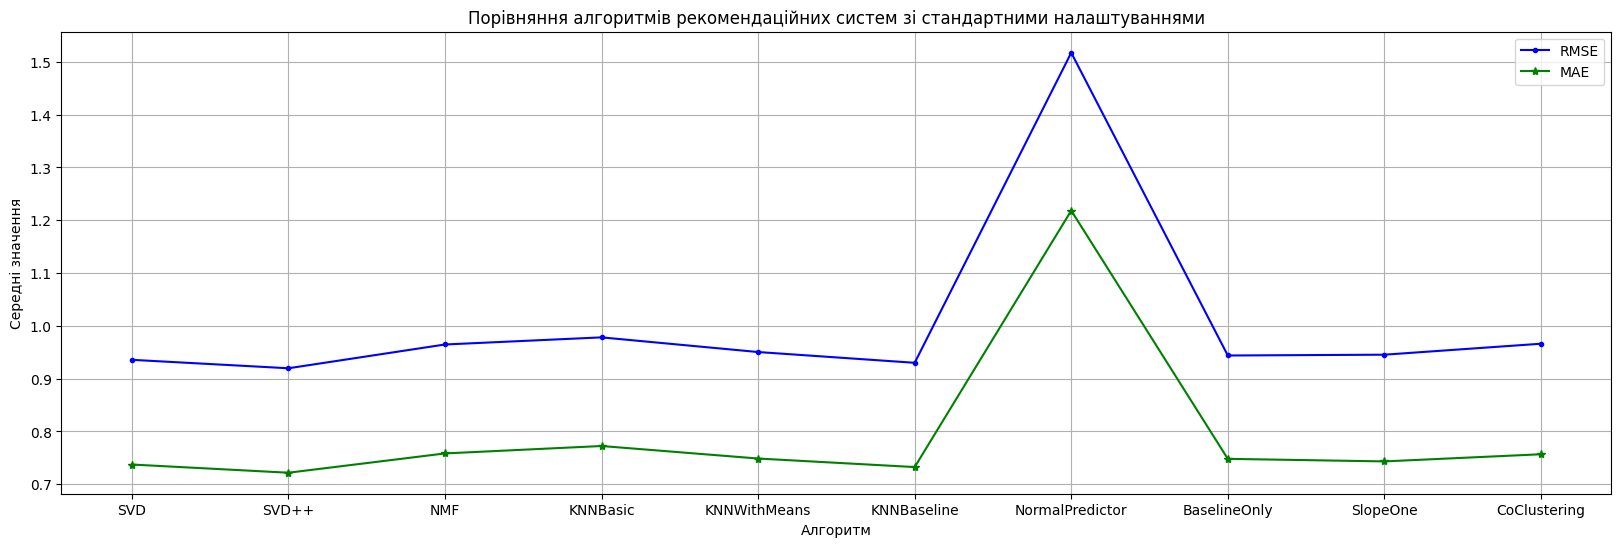

In [25]:
plt.figure(figsize=(20, 6))

plt.plot(results_rmse.keys(), results_rmse.values(), color='b', label='RMSE', marker='.')
plt.plot(results_mae.keys(), results_mae.values(), color='g', label='MAE', marker='*')

plt.xlabel('Алгоритм')
plt.ylabel('Середні значення')
plt.title('Порівняння алгоритмів рекомендаційних систем зі стандартними налаштуваннями')
plt.legend()
plt.grid()
plt.show()

**Висновок!**

Майже всі алгоритми, окрім NormalPredictor показали більщ-меньш однакові показники помилки прогнозування.
Під час тренування були виявлено, що алгоритм SVD++ витрачає значно більше часу ніж інші, також цей алгоритм показав кращі показники прогнозування/рекомендацій.

Теоретично метод SVD дав другі результати якості рекомендацій. Можна спробувати налаштувати цей метод, можливо він дасть параметри схожі до SVD++


In [27]:
param_grid = {
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01]
}

results = []

for ne in param_grid['n_epochs']:
    for lr in param_grid['lr_all']:
        algo = SVD(n_epochs=ne, lr_all=lr)
        cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
        mean_rmse = cv_results['test_rmse'].mean()
        results.append({'n_epochs': ne, 'lr_all': lr, 'mean_rmse': mean_rmse})

df_results = pd.DataFrame(results)

In [28]:
best_params = df_results.loc[df_results['mean_rmse'].idxmin()]
print("Найкращі параметри:")
print(best_params)

Найкращі параметри:
n_epochs     20.000000
lr_all        0.005000
mean_rmse     0.935185
Name: 1, dtype: float64


In [29]:
results_rmse

{'SVD': 0.9356928343075225,
 'SVD++': 0.9196947564233208,
 'NMF': 0.9647282848317852,
 'KNNBasic': 0.9782174152361506,
 'KNNWithMeans': 0.95044021113869,
 'KNNBaseline': 0.9300458141781128,
 'NormalPredictor': 1.5174074476542185,
 'BaselineOnly': 0.9438808687914891,
 'SlopeOne': 0.9453995522007561,
 'CoClustering': 0.9661789251351287}

**нажаль підбір параметрів не досяг значень SVD++**